# My WIP career switch into Data Science & some insights about panel data audiences

## Let me quickly introduce myself

Yes, my past life consisted in pretty much being some sort of entrepreneur, leveraging my hands-on approach to come up, build and execute business ideas. And yes again, among all tasks, when I think about when it all started 6 years ago (and later on), **I’ve always found data and what’s beneath just fascinating**. For this reason, towards the end of last year, **I decided to throw myself** into the data science world by enrolling into a 480 hours full-time **data science certificate** at Constructor Learning (former SIT Learning) in Zürich. If you are reading this you are already in my GitHub. Just in case you are not used to it, you can find my projects and some topics I've been reviewing lately [here](https://github.com/mikjf?tab=repositories). From there just select one and scroll down to find out what I've been working on lately.

## Data Analyst vs. Data Scientist

I've come to understand (and I might be wrong), at least from my point of view, that even tough both **data scientists** and data analysts try to make sense out of existing data, the former **focus** not only on **extrapolating knowledge and insights to maximize the value of data** and find answers for relevant business questions, but also on the **way that data is gathered, manipulated and analysed** through scientific methods, processes, algorithms and modelling techniques.

## Everything starts with data

As today I'm writing this notebook because I'm **interested in a Data Science Associate position** that just opened **at Nielsen**, let's skip the introduction about what's data in general and rather **dive into panel data and why audience is everything**. As I can't lie and I've spent some time on their company website, what I can say is that they state that not all data is equal, and more importantly, having more data is not always better than having less data. As acquiring a large amount of data is often time consuming, resource-intensive and probably even impossible when it comes to capturing all consumers and their behavior for a given product or service, the only feasible solution relies in **mimicking the total population of interest by creating panel groups that represent the overall picture**.

## So what's panel data (and what's not)?

- Cross-sectional data: individual entities measured in a one-time period (taking the weight of 1000 people measured on the same day)

- Time-series data: usually one entitiy measured over multiple time periods (the total daily number of coffee cups sold by a coffee machine at work for 5 years)

- **Panel data**: multiple entities measured over multiple time periods (that's why panel data is also called cross-sectional time-series data

To sum up, panel data comprises both cross-sectional and time-series data characteristics into one single model, basically **collecting data from multiple (but same) objects over time**.

In [1]:
import pandas as pd

# create mock data dictionary
data = {
    'Michael': {
        2020: {'Burgers': 10, 'Fries': 2},
        2021: {'Burgers': 2, 'Fries': 2},
        2022: {'Burgers': 12, 'Fries': 6}
    },
    'Simone': {
        2020: {'Burgers': 14, 'Fries': 1},
        2021: {'Burgers': 7, 'Fries': 7},
        2022: {'Burgers': 10, 'Fries': 5}
    },
    'Roberto': {
        2020: {'Burgers': 15, 'Fries': 0},
        2021: {'Burgers': 5, 'Fries': 5},
        2022: {'Burgers': 2, 'Fries': 3}
    }
}


# dataframe from dictionary iteration
df = pd.DataFrame.from_dict({(i,j): data[i][j] 
                             for i in data.keys() 
                             for j in data[i].keys()}, 
                            orient='index')

# rename and resetting index
df.index.names = ['Name', 'Year']
df.reset_index()

,Name,Year,Burgers,Fries
0,Michael,2020,10,2
1,Michael,2021,2,2
2,Michael,2022,12,6
3,Simone,2020,14,1
4,Simone,2021,7,7
5,Simone,2022,10,5
6,Roberto,2020,15,0
7,Roberto,2021,5,5
8,Roberto,2022,2,3


This dataframe is considered a panel dataset as the variables (number of burgers and fries eaten) are collected in different points in time (years) and for each person under observation (name).

DRAW CS TS ILLUSTRATION

## Important note

As mentioned in my repository, what's coming next is based on external sources. My goal for this notebook is to recreate a walkthrough while trying to understand the concepts behind panel data regression and what's relevant when it comes to this type of data.

## Unobserved heterogeneity leading to endogeneity

To grasp the concept of heterogeneity let's take a pro tennis player and try to assess the relationship between the overall tennis performance and the precision with which the ball is hit. Does hitting on the sweet spot more often (therefore being more precise) lead to a better performance? We can translate this question into a simple linear regression that looks like this:

$performance_i = β_0 + β_1 * precision_i + ε_i$

In [2]:
# performance is the dependent variable (DV)
# β0 is the intercept
# β1 is the regression coefficient
# precision is the independent variable (IV)
# ε is the error term

Let's assume a positive correlation between the independent variable (IV) precision and the dependent variable (DV) performance. This would mean that as IV increases, DV increases as well:

$performance_i\color{blue}{\text{↑}} = β_0 + β_1 * precision_i\color{blue}{\text{↑}} + ε_i$

$\color{blue}{\text{↑}}$ = positive relationship

**What if there was another variable not included in the model that would affect the IV?** If the tennis player was very agile, it would probably get to where he/she needs to hit the ball faster, having more time to aim and hit the ball, thus being more precise. Therefore, **agility could be an unobserved indipendent variable, which would be "hidden" in the error term**.

$performance_i\color{blue}{\text{↑}} = β_0 + β_1 * precision_i\color{blue}{\text{↑}}\color{red}{\text{↑}} + ε_i\color{red}{\text{↑}}$

$\color{red}{\text{↑}}$ = positive correlation between IV and error term with unobserved IV

If agility, the unobserved indipendent variable, was hidden behind the error term and if, for example, agility had a positive correlation with precision as assumed above, we would end up with an over-increased estimater of the dependant variable performance. Here is how the bias would look like:

$performance_i\color{blue}{\text{↑}}\color{pink}{\text{↑}} = β_0 + β_1 * precision_i\color{blue}{\text{↑}}\color{red}{\text{↑}} + ε_i\color{red}{\text{↑}}\color{pink}{\text{↑}}$

$\color{pink}{\text{↑}}$ = over-increase effect

To sum up, the unobserved dependency of other independent variables is called **unobserved heterogeneity** and the correlation between the IV in the current model and the error term (which would be/include the unobserved independent variable) is called **endogeneity**. To solve this potential issue we need to perform a **panel data regression** as we will be able to control heterogeneity in our model by defining whether it is fix or random.

## Types of panel data regression

What comes next will be based and the follownig general notation:

$y_{it} = x_{it}β + α_i + μ_{it}$

for t = 1,...,T and i = 1,...,N

In [3]:
# y = DV
# x = IV(s)
# β = coefficients
# α = individual effects
# μ = idiosyncratic error (unobserved factors that change over time and across units)

There are three types of regression for panel data: **PooledOLS, Fixed-Effects (FE) Model and Random-Effects (RE) Model**.

### PooledOLS

This type of regression is a simple **Ordinary Least Squared (OLS)** model that ignores time and individual characteristics, thus focusing only on the dependencies. For the OLS to work, there needs to be **no correlation between the independent variable (IV) and unobserved indipendent variables (α)**. We can write this down like this:

$cov(x_{it}, α_{i}) = 0$

(covariance between IV and individual effects = 0 --> **exogeneity** assumption)

Even if this assumption holds for PooledOLS, the individual effects α might still have a serial correlation issue over time (an individual effect is a lagged version of itself and a correlation between the values over the period of time have an effect on the following ones). Therefore, this model is not suitable for panel data.

$cov(α_{i}, α_{i}) = var(α_{i}) > 0$

(serial correlation between α)

Apparently there is another regression model called Feasible Generalized Least Squares, used in the third model we will see in a while, that counter this serial correlation issue.

### Fixed-Effects (FE) Model

This model states that individual effects of **unobserved indipendente variables (α) are constant (fixed) over time**. When using the FE model a relationship between α and x (IV), previously called as endogeneity, can exist. Why? Because if we assume α to be a constant and substract the mean values from each equation term, α minus the mean of α values will give zero and can be neglected.

$cov(x_{it}, α_{i}) ≠ 0$

(covariance between IV and individual effects ≠ 0 --> **endogeneity** allowed)

The idea here (can't hide it's getting somehow tricky for me), to sum up, is that only the idiosyncratic error remains and has to be exogen and non-collinear (correlation doesn't cause issues). FYI, another model called Least Squares Dummy Variables model (LSDV) can be used as an alternative to the FE model. In the LSDV model the fixed individual effects are represented by dummy variables. The result will be the same but it seems that it will take more computation power to run the regression model.

### Random-Effects (RE) Model

In this model the unobserved independent variables (α) are set as random variables over time. This approach **enables the model to switch between OLS and FE**, focusing on both dependencies between and within individuals.

Depending on the covariance betweeen α and IV, one or the other model estimator will be preferred by the RE model:

if $cov(x_{it}, α_{i}) = 0$ there is no correlation between IV and α --> OLS

if $cov(x_{it}, α_{i}) ≠ 0$ the covariance is not zero for IV and α --> FE model

As OLS, as mentioned for Pooled OLS, can lead to serial correlation between α individual effects, the RE model will determine which model to take according to the serial correlation of the error terms by using **lambda** (how big the variance of α is).

$λ = 1 - (\frac{σ_{μ}^2}{σ_{μ}^2 + T * σ_{α}^2})$

If the variance of α is zero the formula will give λ = 0 and OLS will be used.

If the variance of α becomes very big the formula will give λ = 1 and FE will be used.

## How to decide which model best fits the panel data

There are give assumptions for simple linear regression models that must be fulfilled:
- linearity
- exogeneity (IV not dependent on DV)
- homoskedasticity (same error term across all values of the IV) and non-autocorrelation 
- independent variables are not stochastic (non probabilistic)
- no multicollinearity (no perfect exact relationship among exploratory variables)

If exogeneity + homoskedasticity/non-autocorrelation are violated, FE or RE might be more suitable. At this point the choice will depend on whether the unobserved heterogeneity leading to endogeneity is constant or a random effect. The **Hausman-Test** tests for endogeneity, where the null hypothesis is that the covariance between IV and α is zero. If it's the case, RE is preferred over FE. If the p-value is very small on the other hand, the null hypothesis can be rejected and the FE model will be used.

## Implementing panel data models

### Import dataset and transform data

Let's set violent crime rates (incidents/100k inhabitants) as our DV, income (personal income per capita) as IV, the year column as the time period and the state as single entities under observation.

The question we would like to answer is: **how does the income affects crime rate?**

In [4]:
# import pandas if not done above
import pandas as pd

# import guns.csv dataset
dataset = pd.read_csv("data/guns.csv", sep='\t', usecols = ['state', 'year', 'income', 'violent'], index_col = ['state', 'year'])

# get values for a level of the state/year multi index and creates a list
years = dataset.index.get_level_values('year').to_list()

# set year as dtype category
dataset['year'] = pd.Categorical(years)

# check format
dataset.head(25)

violent     income  year
state   year                          
Alabama 1977    414.4   9563.148  1977
        1978    419.1   9932.000  1978
        1979    413.3   9877.028  1979
        1980    448.5   9541.428  1980
        1981    470.5   9548.351  1981
        1982    447.7   9478.919  1982
        1983    416.0   9783.000  1983
        1984    431.2  10357.200  1984
        1985    457.5  10725.860  1985
        1986    558.0  11091.620  1986
        1987    559.2  11323.820  1987
        1988    558.6  11654.960  1988
        1989    590.8  11963.900  1989
        1990    708.6  12063.980  1990
        1991    844.2  12087.820  1991
        1992    871.7  12398.020  1992
        1993    780.4  12395.800  1993
        1994    683.7  12673.920  1994
        1995    632.4  12872.680  1995
        1996    565.4  12908.910  1996
        1997    564.5  13121.110  1997
        1998    512.1  13514.100  1998
        1999    490.2  13737.260  1999
Alaska  1977    443.2  20296.830  1977
        1978    441.9  19044.990  1978

In [5]:
# check shape
dataset.shape

(1173, 3)

In [6]:
# check null values
dataset.notnull().count()

violent    1173
income     1173
year       1173
dtype: int64

Having **no missing values** within our dataframe means that the panel dataset is **balanced**.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1173 entries, ('Alabama', 1977) to ('Wyoming', 1999)
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   violent  1173 non-null   float64 
 1   income   1173 non-null   float64 
 2   year     1173 non-null   category
dtypes: category(1), float64(2)
memory usage: 25.8+ KB


### PooledOLS

In [8]:
# import PooledOLS and statsmodels
from linearmodels import PooledOLS
import statsmodels.api as sm

# run PooledOLS
# IV
exog = sm.tools.tools.add_constant(dataset['income'])
# DV
endog = dataset['violent']
# model
mod = PooledOLS(endog, exog)
# model fit
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# store values for checking homoskedasticity graphically
# fitted values
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
# residual values
residuals_pooled_OLS = pooledOLS_res.resids

### Homoskedasticity condition check

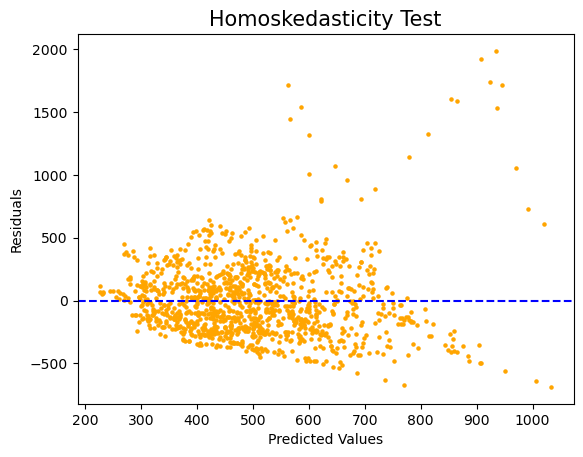

In [9]:
# Homoskedasticity

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# plot residuals (growth variance detection)
fig, ax = plt.subplots()

# scatter residuals
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'orange', s=5)

# residual 0 value line
ax.axhline(0, color = 'b', ls = '--')

# set labels and title
ax.set_xlabel('Predicted Values', fontsize = 10)
ax.set_ylabel('Residuals', fontsize = 10)
ax.set_title('Homoskedasticity Test', fontsize = 15)

# show plot
plt.show()

In [10]:
# x-axis -> predicted values
# y-axis -> residuals

As the **data points spread out**, meaning the the variance is growing, we can start to believe that **heteroskedasticity** is present and the condition **(homoskedasticity) might be violated**. Let's check with the White-Test and the Breusch-Pagan-Test:

In [11]:
# data preparation
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)

In [12]:
# White-Test

# import package
from statsmodels.stats.diagnostic import het_white

# get test results
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)

# set labels
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']

# print results
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 200.15502156044542, 'LM p-val': 3.442621728589391e-44, 'F-Stat': 120.35903993735393, 'F p-val': 2.9254535557178634e-48}


In [13]:
# Breusch-Pagan-Test

# import package
from statsmodels.stats.diagnostic import het_breuschpagan

# get test results
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)

# set labels
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']

# print results
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 110.9616604422172, 'LM p-val': 6.032616972195138e-26, 'F-Stat': 122.34596392437189, 'F p-val': 4.048137598793346e-27}


As both test show a **p-value < 0.05, the homoskedasticity condition is violated**.

### Non-autocorrelation condition check

Let's use the **Durbin-Watson-Test** to determine whether there ia an autocorrelation or not. The result can be between 0 and 4, with 2 meaning no autocorrelation, and values closer to 0 and 4 showing respectively positive and negative autocorrelation.

In [14]:
# Non-autocorrelation

# import package
from statsmodels.stats.stattools import durbin_watson

# get test results
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])

# print results
print(durbin_watson_test_results)

0.08937264851640205


The result is very **close to 0**, showing therefore a **strong positive correlation**. The **non-autocorrelation condition is violated**. We need therefore move to FE/RE models which should be more suitable.

### Fixed-Effect and Random-Effect models

In [15]:
# import FE model
from linearmodels import PanelOLS

# import RE model
from linearmodels import RandomEffects

# DV
exog = sm.tools.tools.add_constant(dataset['income'])

# IV
endog = dataset['violent']

# FE model and fit residuals
model_fe = PanelOLS(endog, exog, entity_effects = True)
fe_res = model_fe.fit() 

# RE model and fit residuals
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit()

In [16]:
# print FE model results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                violent   R-squared:                        0.1127
Estimator:                   PanelOLS   R-squared (Between):              0.1141
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Fri, Mar 31 2023   R-squared (Overall):              0.1140
Time:                        11:59:08   Log-likelihood                   -7081.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      142.39
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1121)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             142.39
                            

In [17]:
# print RE model results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                violent   R-squared:                        0.1128
Estimator:              RandomEffects   R-squared (Between):              0.1159
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Fri, Mar 31 2023   R-squared (Overall):              0.1156
Time:                        11:59:08   Log-likelihood                   -7109.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      148.90
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1171)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             148.90
                            

Both models perform in a very similar way. **To understand which one we should pick as our best model we need to run a Hausman-Test**:

In [18]:
# importing packages
import numpy.linalg as la
from scipy import stats
import numpy as np

# creating hausman function (copied)
def hausman_test(fe, re):
    
    # get estimated parameters and variance-covariance matrices
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov

    # compute degrees of freedom
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 

    # compute p-value
    pval = stats.chi2.sf(chi2, df)
    
    # return
    return chi2, df, pval

# run function
hausman_results = hausman_test(fe_res, re_res)

# print results
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 9.42637134332877
degrees of freedom: 2
p-Value: 0.008976136961676722


What we wanted to know with this last test is whether the unobserved heterogeneity leading to endogeneity is constant or a random effect. This endogeneity is tested via the Hausman-Test we just performed, where the null hypothesis was that the covariance between IV and α is zero. **Since the p-value is very small, the null hypothesis can in this case be rejected**, meaning that the covariance is not zero and **therefore the FE model is preferred**.

## Final thoughts

As stated at the beginning of this notebook, my goal was to understand how panel data is analyzed and what are the main issues that data scientists could face while trying to validate the dataset in question. This walkthrough raised for sure my awareness, even if I believe I will need to go through this a couple of times before getting the most of it. Thank you!